## 미니 프로젝트
### Pandas로 국민청원 데이터 분석하기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
df = pd.read_csv('petition.csv', parse_dates = ['start', 'end'])

In [3]:
# 데이터 살펴보기
df.shape

(395547, 8)

In [4]:
df.head(5)

,article_id,start,end,answered,votes,category,title,content
0,21,2017-08-19,2017-11-17,0,9,안전/환경,스텔라 데이지호에 대한 제안입니다.,스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1,22,2017-08-19,2017-11-17,0,17,기타,비리제보처를 만들어주세요.,현 정부에 국민들이 가장 원하는 것은 부패척결입니다. 우리 사회에 각종 비리들이 ...
2,23,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."
3,24,2017-08-19,2017-08-26,0,53,일자리,공공기관 무조건적인 정규직전환을 반대합니다.,현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4,25,2017-08-19,2017-09-03,0,0,미래,제2의 개성공단,"만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ..."


In [5]:
df.tail(5)

,article_id,start,end,answered,votes,category,title,content
395542,517117,2019-02-04,2019-03-06,0,3,보건복지,명절연휴 고속도로 무료반대,명절고속도로 무료보단 대다수의 서민들이 이용하는 대중교통 무료와 명절기간 증차로 했...
395543,517119,2019-02-04,2019-03-06,0,23,보건복지,광주사태 가짜 유공자들 정수기로 걸려내야함,광주사태 유공자들 차고 넘치는데 이래 많은 유공자들 그냥놓아두면 재앙이다.\n김대중...
395544,517120,2019-02-04,2019-03-06,0,0,안전/환경,환경문제,명절이면 후로 제일문제는 쓰레기 문제 입니다.\n제일문제는 선물세트와 농산물세트 입...
395545,517121,2019-02-04,2019-03-06,0,20,정치개혁,"청화대,더불어민주당, 당장 답하라,,,,,,","좌파 더불어민주당, 좌파 정권 청화대는 선한 국민들을 더는 기망하지 말고 담장 답하..."
395546,517122,2019-02-04,2019-03-06,0,16,인권/성평등,여성부 폐지,국민들이 원합니다\n폐지 좀 시키세요;


In [6]:
# 결측치 확인
df.isnull().sum()

article_id    0
start         0
end           0
answered      0
votes         0
category      0
title         0
content       1
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395547 entries, 0 to 395546
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   article_id  395547 non-null  int64         
 1   start       395547 non-null  datetime64[ns]
 2   end         395547 non-null  datetime64[ns]
 3   answered    395547 non-null  int64         
 4   votes       395547 non-null  int64         
 5   category    395547 non-null  object        
 6   title       395547 non-null  object        
 7   content     395546 non-null  object        
dtypes: datetime64[ns](2), int64(3), object(3)
memory usage: 24.1+ MB


In [8]:
df.columns

Index(['article_id', 'start', 'end', 'answered', 'votes', 'category', 'title',
       'content'],
      dtype='object')

In [9]:
# 수치형 데이터 요약
df.describe()

,article_id,answered,votes
count,395547.000000,395547.000000,3.955470e+05
mean,251608.934635,0.000073,1.501188e+02
std,153219.216242,0.008562,4.802583e+03
min,21.000000,0.000000,0.000000e+00
25%,115236.500000,0.000000,2.000000e+00
50%,253682.000000,0.000000,5.000000e+00
75%,386137.500000,0.000000,1.500000e+01
max,517122.000000,1.000000,1.192049e+06


In [10]:
# 카테고리형 데이터 요약
df.describe(include = np.object)

,category,title,content
count,395547,395547,395546
unique,17,346524,375224
top,정치개혁,이명박 출국금지,이명박 출국금지
freq,62750,3018,597


In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# 한글 깨짐 수정
import matplotlib
from matplotlib import font_manager, rc
import platform
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family = font_name)
# 그래프에서 마이너스 기호 표시
matplotlib.rcParams['axes.unicode_minus'] = False

### 각 분야별 청원 수 

In [13]:
category = pd.DataFrame(df['category'].value_counts()).reset_index()
category.columns = ['category', 'counts']
category

,category,counts
0,정치개혁,62750
1,기타,48682
2,인권/성평등,34993
3,안전/환경,30638
4,교통/건축/국토,28184
5,외교/통일/국방,26626
6,육아/교육,25537
7,보건복지,24848
8,일자리,23225
9,행정,20268


<IPython.core.display.Javascript object>


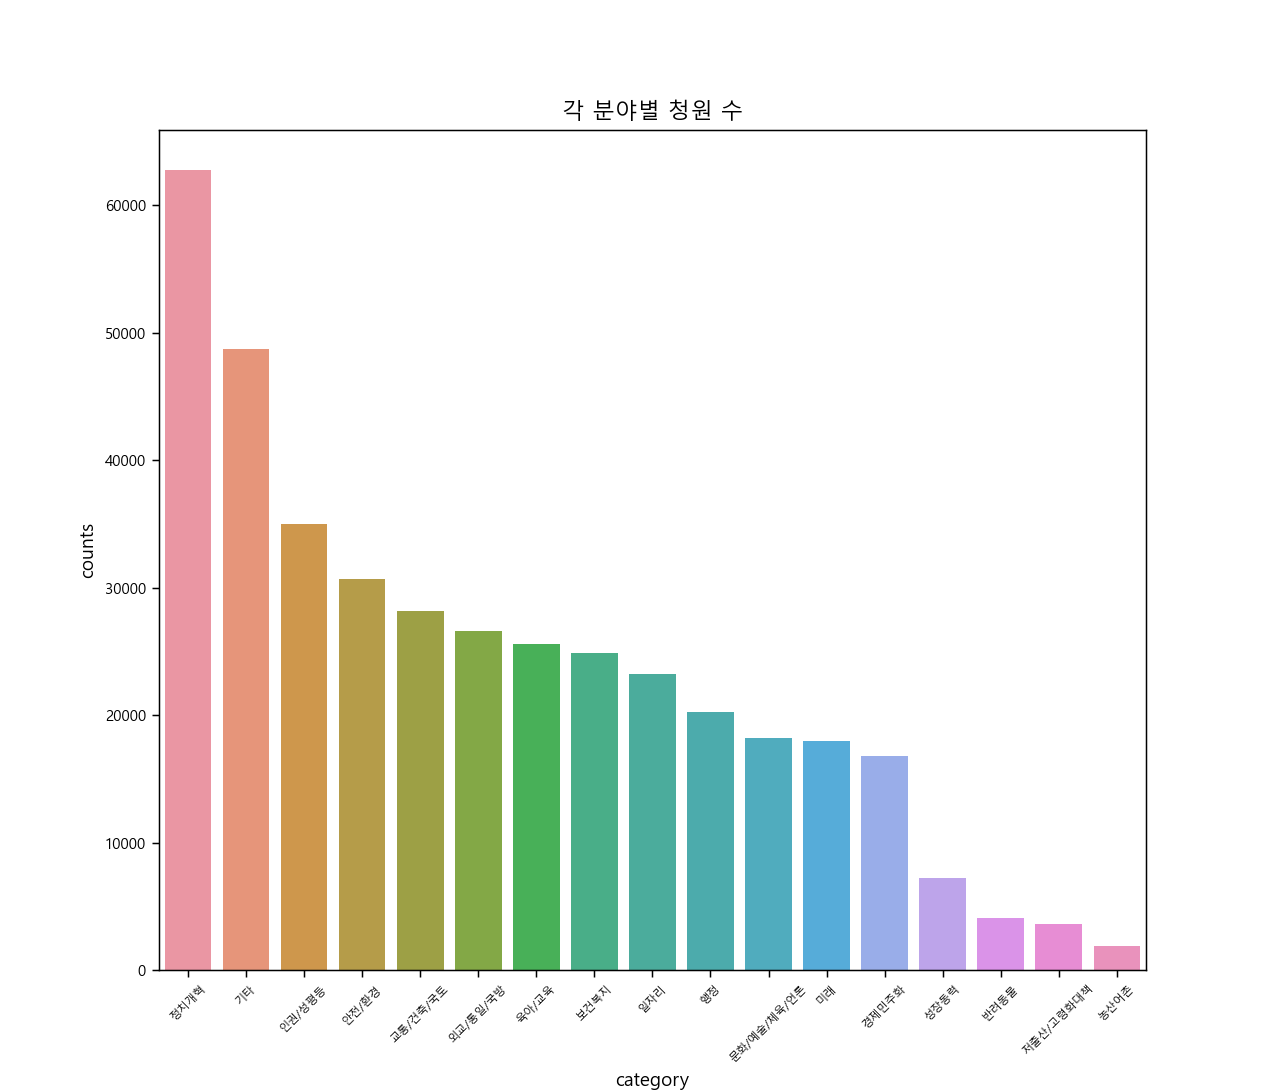

Text(0, 0.5, 'counts')

In [14]:
# 그래프 그리기
plt.rcParams['figure.figsize'] = [7,6]
ax = plt.subplots()
ax = sns.barplot(x='category', y='counts', data=category)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=8)
ax.set_title('각 분야별 청원 수', fontsize=12)
ax.set_xlabel('category', fontsize=10)
ax.set_ylabel('counts', fontsize=10)

- 정치외교 분야의 청원 수가 62,750건으로 압도적으로 많으며, 기타, 인원/성평등, 안전/환경 순으로 많다. 성장/동력, 반려동물, 저출산/고령화대책, 농산어촌 분야의 청원 수는 10,000건 이하이며 다른 분야들에 비해 청원 수가 매우 적다.   

### 각 분야별 답변대상 청원 수

In [15]:
# 답변대상 청원 보기
df_20 = df.loc[df['votes'] > 200000]
df_20.shape

(80, 8)

In [16]:
c_df_20 = pd.DataFrame(df_20.category.value_counts()).reset_index()
c_df_20.columns = ['category', 'counts']
c_df_20

,category,counts
0,인권/성평등,24
1,안전/환경,10
2,기타,8
3,정치개혁,8
4,문화/예술/체육/언론,7
5,반려동물,4
6,외교/통일/국방,4
7,교통/건축/국토,3
8,보건복지,3
9,육아/교육,3


<IPython.core.display.Javascript object>


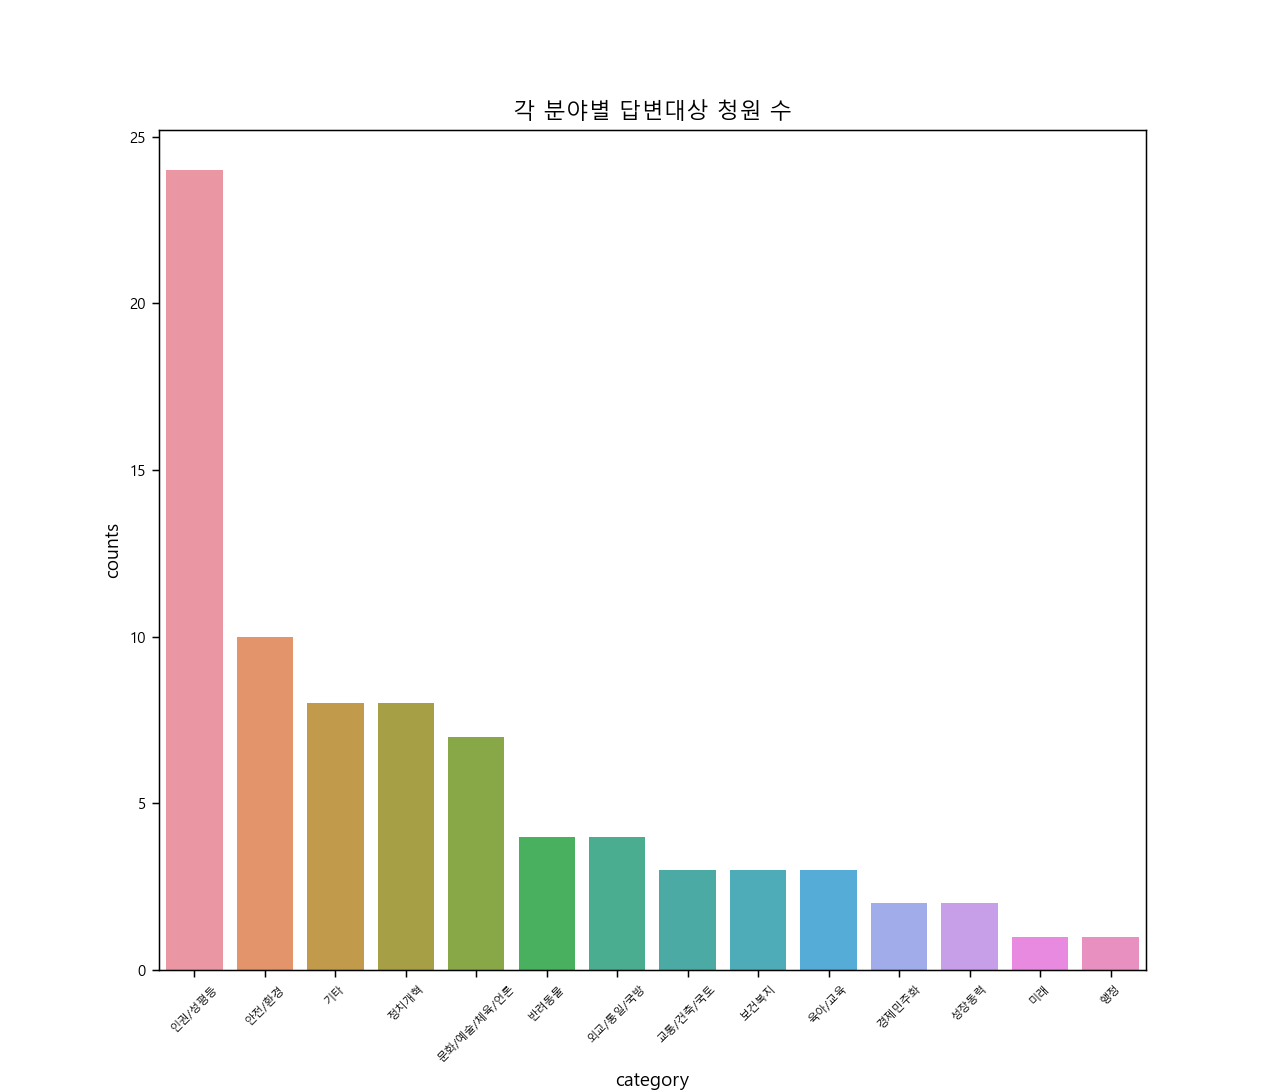

Text(0, 0.5, 'counts')

In [17]:
# 그래프 그리기
ax = plt.subplots(figsize=(7,6))
ax = sns.barplot(x='category', y='counts', data=c_df_20)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=8)
ax.set_title('각 분야별 답변대상 청원 수', fontsize=12)
ax.set_xlabel('category', fontsize=10)
ax.set_ylabel('counts', fontsize=10)

- 답변대상 청원 수는 인권/성평등 분야가 24건으로 가장 많으며, 안전/환경이 10건, 정치개혁과 기타 8건, 문화/예술/체육/언론 분야가 7건이다. 이외의 분야는 모두 5건 이하이다.

#### 각 분야별 답변대상 청원 비율

In [18]:
ans_rat = pd.merge(category, c_df_20, on='category')
ans_rat.columns = ['category', 'counts', 'answer']
ans_rat['rate'] = ans_rat['answer']/ans_rat['counts']
ans_rat = ans_rat.sort_values('rate', ascending=False)
ans_rat

,category,counts,answer,rate
13,반려동물,4057,4,0.000986
2,인권/성평등,34993,24,0.000686
9,문화/예술/체육/언론,18207,7,0.000384
3,안전/환경,30638,10,0.000326
12,성장동력,7253,2,0.000276
1,기타,48682,8,0.000164
5,외교/통일/국방,26626,4,0.000150
0,정치개혁,62750,8,0.000127
7,보건복지,24848,3,0.000121
11,경제민주화,16793,2,0.000119


- 반려동물 분야의 답변대상 청원 비율이 가장 높으며, 다음으로 인권/성평등 분야의 비율이 높다. 전체적으로 청원 수에 비해 답변대상에 해당되는 청원 수가 극히 적음을 알 수 있다.

### 각 분야별 답변대상 청원 중 실제 답변된 청원 수

In [19]:
# 답변대상 청원을 'answer' 컬럼에 저장하기
df['answer'] = (df['votes'] > 200000) ==1

In [20]:
df.shape

(395547, 9)

In [21]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                  bool
dtype: object

In [22]:
df['answer'] = df['answer'].astype('int')

In [23]:
df.dtypes

article_id             int64
start         datetime64[ns]
end           datetime64[ns]
answered               int64
votes                  int64
category              object
title                 object
content               object
answer                 int32
dtype: object

In [24]:
# 답변대상 청원중 실제 답변된 청원
answer_df = df['answer']==1
answered_df = df['answered']==1
ans_yes_df = df[answer_df & answered_df]
ans_yes_df

,article_id,start,end,answered,votes,category,title,content,answer
1752,1785,2017-09-03,2017-11-02,1,296330,인권/성평등,청소년이란 이유로 보호법을 악용하는 잔인무도한 청소년들이 늘어나고있습니다. 반드시 ...,안녕하십니까. 청소년보호법이란 명목하에 나쁜짓을 일삼는 청소년들이 너무나 많아지고 ...,1
10894,10949,2017-09-06,2017-12-05,1,615354,미래,조두순 출소반대,제발 조두순 재심다시해서 무기징역으로 해야됩니다!!!,1
18111,18278,2017-09-30,2017-10-30,1,235372,인권/성평등,낙태죄 폐지와 자연유산 유도약(미프진) 합법화 및 도입을 부탁드립니다.,안녕하세요. 존경하는 대통령님 의원님\n낙태죄 폐지를 청원합니다.\n현재 대한민국은...,1
25032,26024,2017-11-04,2017-12-04,1,216774,안전/환경,'주취감형(술을 먹으면 형벌 감형)' 폐지를 건의(청원)합니다.,"'주취감형'이란, 술을 먹고 범행을 저지를 때, 심신미약 (이성이 없고 우발적)이라...",1
43992,45581,2017-11-17,2017-12-17,1,281985,보건복지,"권역외상센터 (이국종 교수님) 추가적, 제도적, 환경적, 인력 지원","청원사항)\n중증외상분야의 추가적, 제도적, 환경적, 인력 지원 방안마련\n현 의료...",1
47285,49083,2017-11-24,2017-12-24,1,211064,기타,"전안법. 18살, 미성년자에게 정부가 직접 찍어주는 범죄자 낙인!","3년 이하의 징역, 또는3천만원 이하의 벌금. 혹은 500만원 이하의 과태료.\n설...",1
54896,57132,2017-12-03,2018-01-02,1,255554,성장동력,전안법 합리적으로 개정 또는 폐지해주세요.(소상공인 소비자 모두 죽는법안입니다.),2017년 1월 28일부터 시행되는 법령으로 국가기술표준원에서 관리하는 전기제품에만...,1
70744,76020,2017-12-28,2018-01-27,1,228295,성장동력,<가상화폐규제반대> 정부는 국민들에게 단 한번이라도 행복한 꿈을 꾸게 해본적 있습니까?,저는 정부에게 묻고 싶습니다.\n정부는 단 한번이라도 우리 국민들에게 행복한 꿈을 ...,1
73197,79162,2018-01-03,2018-02-02,1,233842,인권/성평등,미성년자 성폭행 형량 올려주세요 종신형원합니다,또 창원에서 조두순사건과 같은 사건이 발생했네요\n술먹어 심신이 미약하신 50대 대...,1
74640,81026,2018-01-06,2018-02-05,1,213219,인권/성평등,초.중.고 학교 페미니즘교육 의무화,아직 판단이 무분별한 어린학생들이 학교에서 여성비하적요소가 들어있는 단어들을 아무렇...,1


In [25]:
# 분야별 답변대상 청원 중 실제 답변된 청원 수
ans_yes_cat = pd.DataFrame(ans_yes_df.category.value_counts()).reset_index()
ans_yes_cat.columns = ['category', 'counts']
ans_yes_cat

,category,counts
0,인권/성평등,9
1,문화/예술/체육/언론,4
2,교통/건축/국토,2
3,보건복지,2
4,성장동력,2
5,안전/환경,2
6,정치개혁,2
7,경제민주화,1
8,미래,1
9,육아/교육,1


<IPython.core.display.Javascript object>


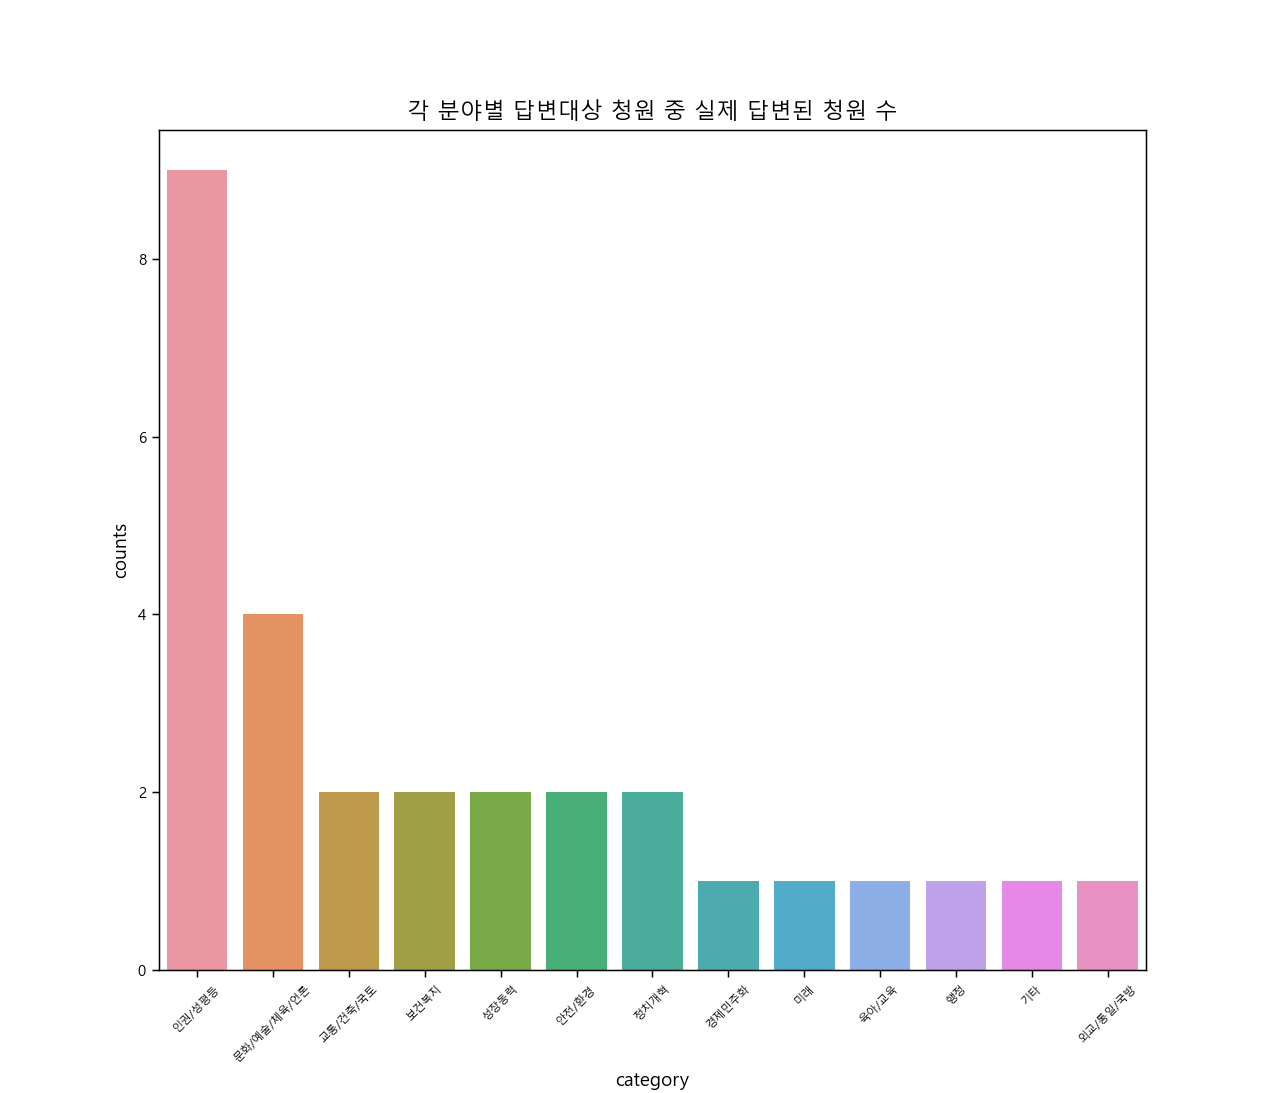

Text(0, 0.5, 'counts')

In [26]:
# 그래프 그리기
ax = plt.subplots(figsize=(7,6))
ax = sns.barplot(x='category', y='counts', data=ans_yes_cat)
plt.xticks(rotation=45, fontsize=6)
plt.yticks(fontsize=8)
ax.set_title('각 분야별 답변대상 청원 중 실제 답변된 청원 수', fontsize=12)
ax.set_xlabel('category', fontsize=10)
ax.set_ylabel('counts', fontsize=10)

- 답변대상 청원 중 인권/성평등 분야의 실제 답변된 청원 수가 9건으로 다른 분야들에 비해 월등히 많다. 문화/예술/체육/언론이 4건으로 그 다음으로 많다.

#### 각 분야별 답변대상 청원 중 실제 답변 비율

In [27]:
ans_yes_rat = pd.merge(c_df_20, ans_yes_cat, on='category')
ans_yes_rat.columns = ['category', 'answer', 'answered']
ans_yes_rat['rate'] = ans_yes_rat['answered']/ans_yes_rat['answer']
ans_yes_rat = ans_yes_rat.sort_values('rate', ascending=False)
ans_yes_rat

,category,answer,answered,rate
10,성장동력,2,2,1.000000
11,미래,1,1,1.000000
12,행정,1,1,1.000000
6,교통/건축/국토,3,2,0.666667
7,보건복지,3,2,0.666667
4,문화/예술/체육/언론,7,4,0.571429
9,경제민주화,2,1,0.500000
0,인권/성평등,24,9,0.375000
8,육아/교육,3,1,0.333333
3,정치개혁,8,2,0.250000


- 성장동력 분야에서 답변대상 2건 중 실제 답변 2건, 행정, 미래 분야에서 답변 대상 1건 중 실제 답변 1건으로 비율이 가장 높다. 한편, 인권/성평등 분야는 답변대상 청원 수가 24건으로 가장 많지만, 실제 답변된 청원 수는 9건에 그쳤다.

### 각 분야별 평균 투표 수

In [28]:
votes_mean = df.groupby('category', as_index=False).votes.mean()
votes_mean = votes_mean.sort_values('votes',ascending=False)
votes_mean

,category,votes
6,반려동물,509.397091
12,인권/성평등,358.910296
4,문화/예술/체육/언론,227.923106
9,안전/환경,215.587669
11,육아/교육,175.247562
7,보건복지,174.710681
10,외교/통일/국방,138.815894
8,성장동력,120.203640
2,기타,106.619859
0,경제민주화,103.589591


- 반려동물 분야의 투표 수 평균이 509.397091로 가장 높으며, 인권/성평등 분야의 평균이 358.910296으로 그 다음이다. 문화/예술/체육/언론, 안전/환경, 육아/교육 순으로 높다.

### 각 분야별 답변대상 청원의 평균 투표수

In [29]:
ans_cat = df.groupby(['category','answer'], as_index=False).votes.mean()
ans_cat_drop = ans_cat[ans_cat['answer']==0].index
ans_cat = ans_cat.drop(ans_cat_drop)
ans_cat_mean = ans_cat.sort_values('votes',ascending=False)
ans_cat_mean

,category,answer,votes
10,미래,1,615354.000000
20,외교/통일/국방,1,396422.500000
18,안전/환경,1,320616.900000
30,행정,1,302082.000000
22,육아/교육,1,284098.333333
3,교통/건축/국토,1,280832.666667
8,문화/예술/체육/언론,1,276733.285714
28,정치개혁,1,268470.375000
24,인권/성평등,1,264378.208333
5,기타,1,263024.125000


- 미래 분야의 투표 수 평균이 61만 5354로 가장 높고, 외교/통일/국방, 안전/환경, 행정 분야 순으로 높다. 대부분의 분야의 투표 수 평균은 30만 이하이다. 앞에서 살펴본 각 분야별 평균 투표 수와 차이가 매우 큼을 확인할 수 있다.

### 년도별/월별/요일별 청원 수

In [30]:
# 년, 월, 일을 새로운 칼럼에 저장
df['start_year'] = df['start'].dt.year
df['start_month'] = df['start'].dt.month
df['start_dow'] = df['start'].dt.dayofweek
df.shape

(395547, 12)

<IPython.core.display.Javascript object>


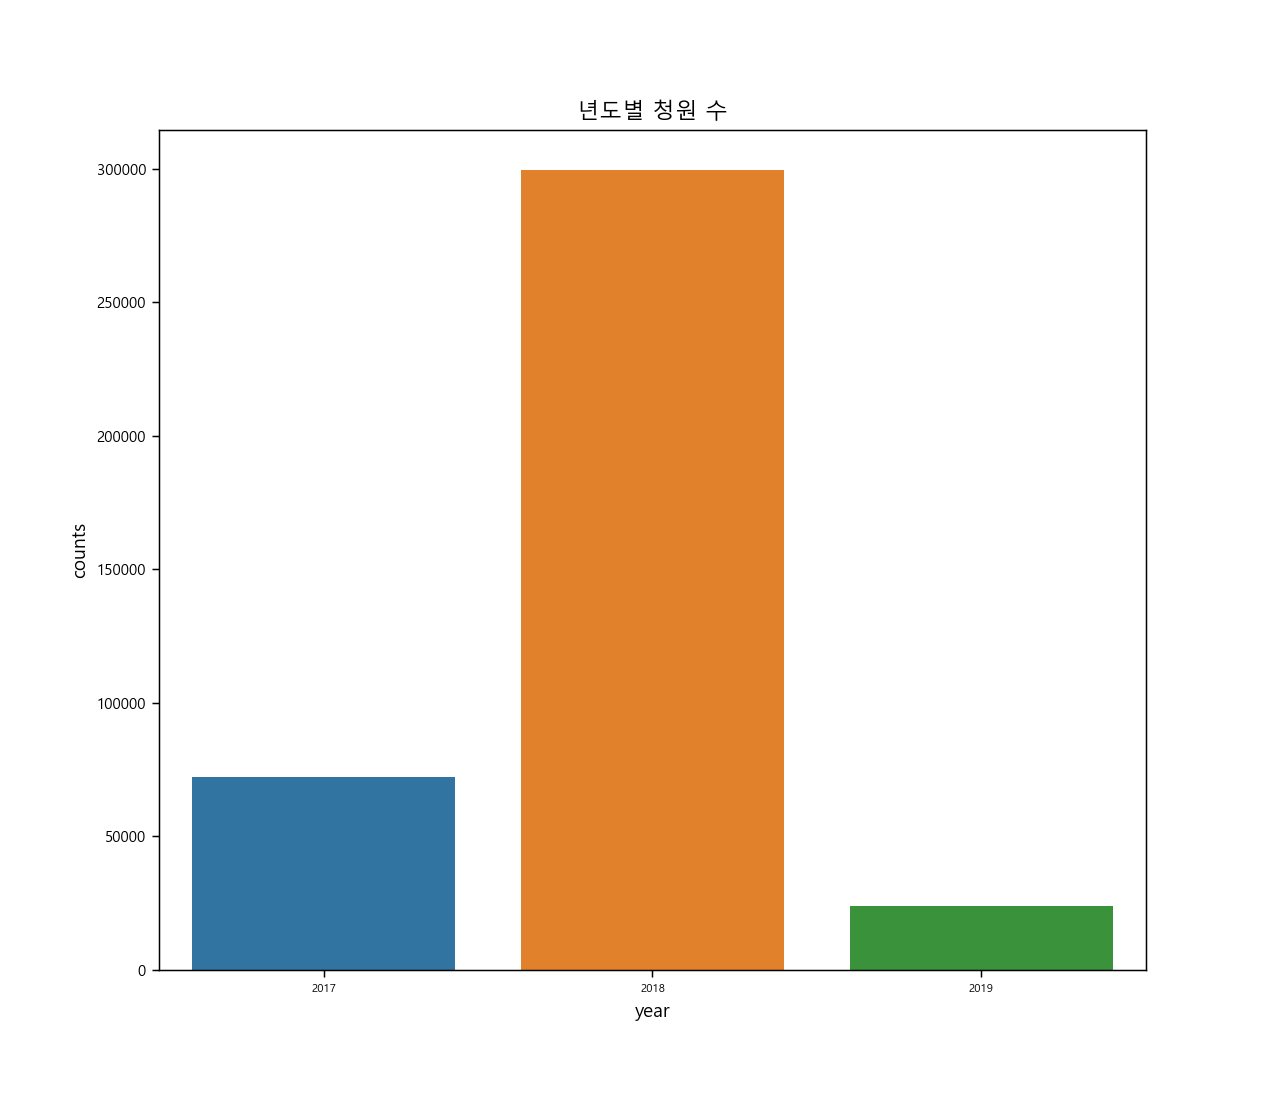

Text(0, 0.5, 'counts')

In [31]:
# 년도별 청원 수 그래프 그리기
ax = plt.subplots(figsize=(7,6))
ax = sns.countplot(x='start_year', data=df)
plt.xticks(fontsize=6)
plt.yticks(fontsize=8)
ax.set_title('년도별 청원 수', fontsize=12)
ax.set_xlabel('year', fontsize=10)
ax.set_ylabel('counts', fontsize=10)

<IPython.core.display.Javascript object>


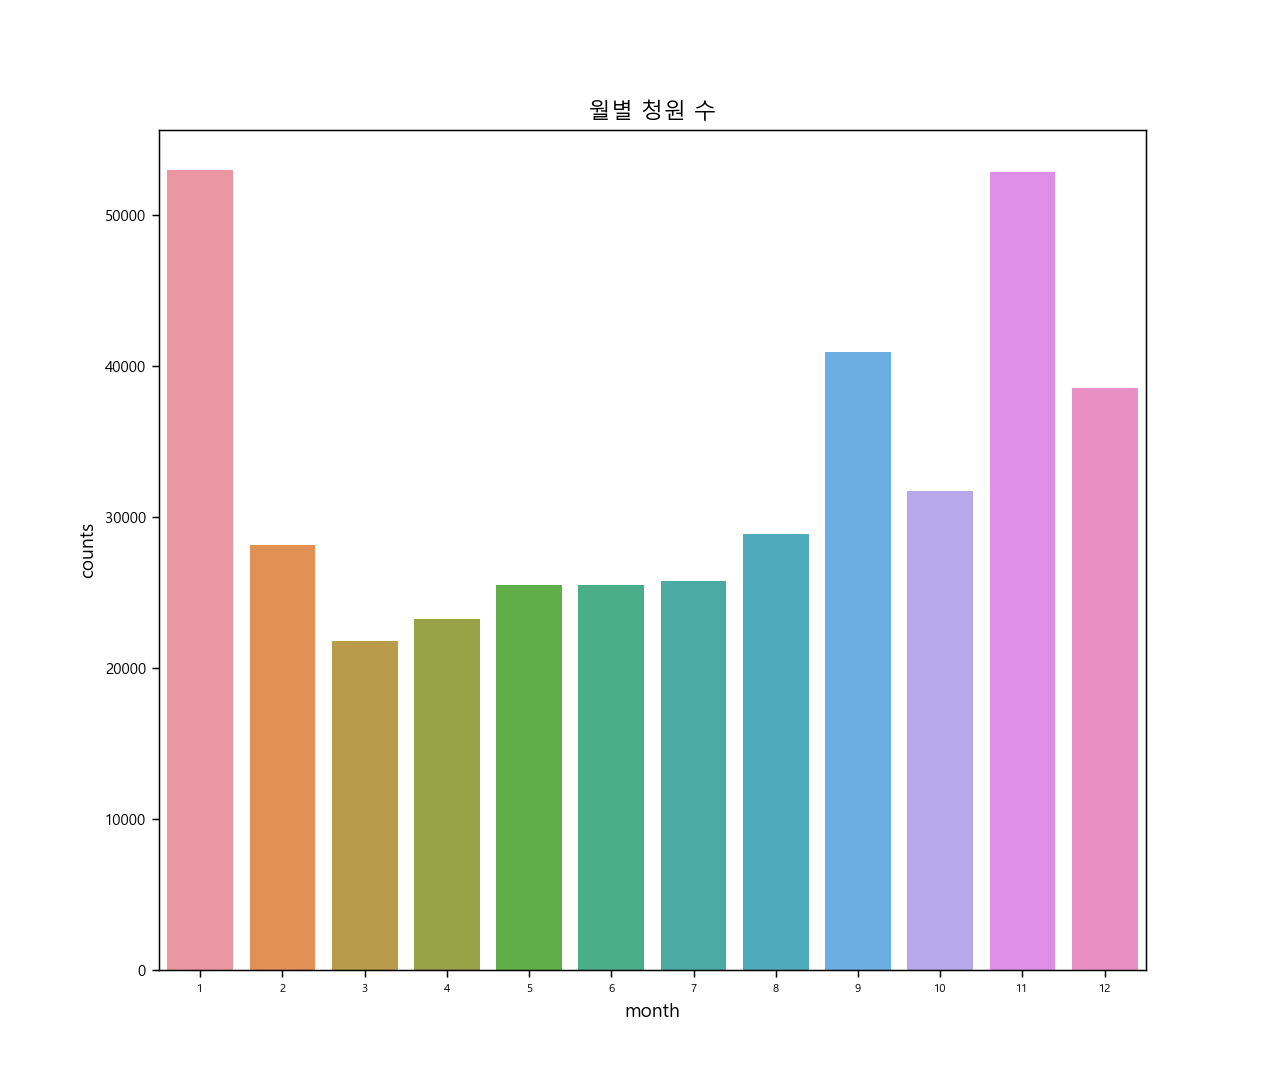

Text(0, 0.5, 'counts')

In [32]:
# 월별 청원 수 그래프 그리기
ax = plt.subplots(figsize=(7,6))
ax = sns.countplot(x='start_month', data=df)
plt.xticks(fontsize=6)
plt.yticks(fontsize=8)
ax.set_title('월별 청원 수', fontsize=12)
ax.set_xlabel('month', fontsize=10)
ax.set_ylabel('counts', fontsize=10)

<IPython.core.display.Javascript object>


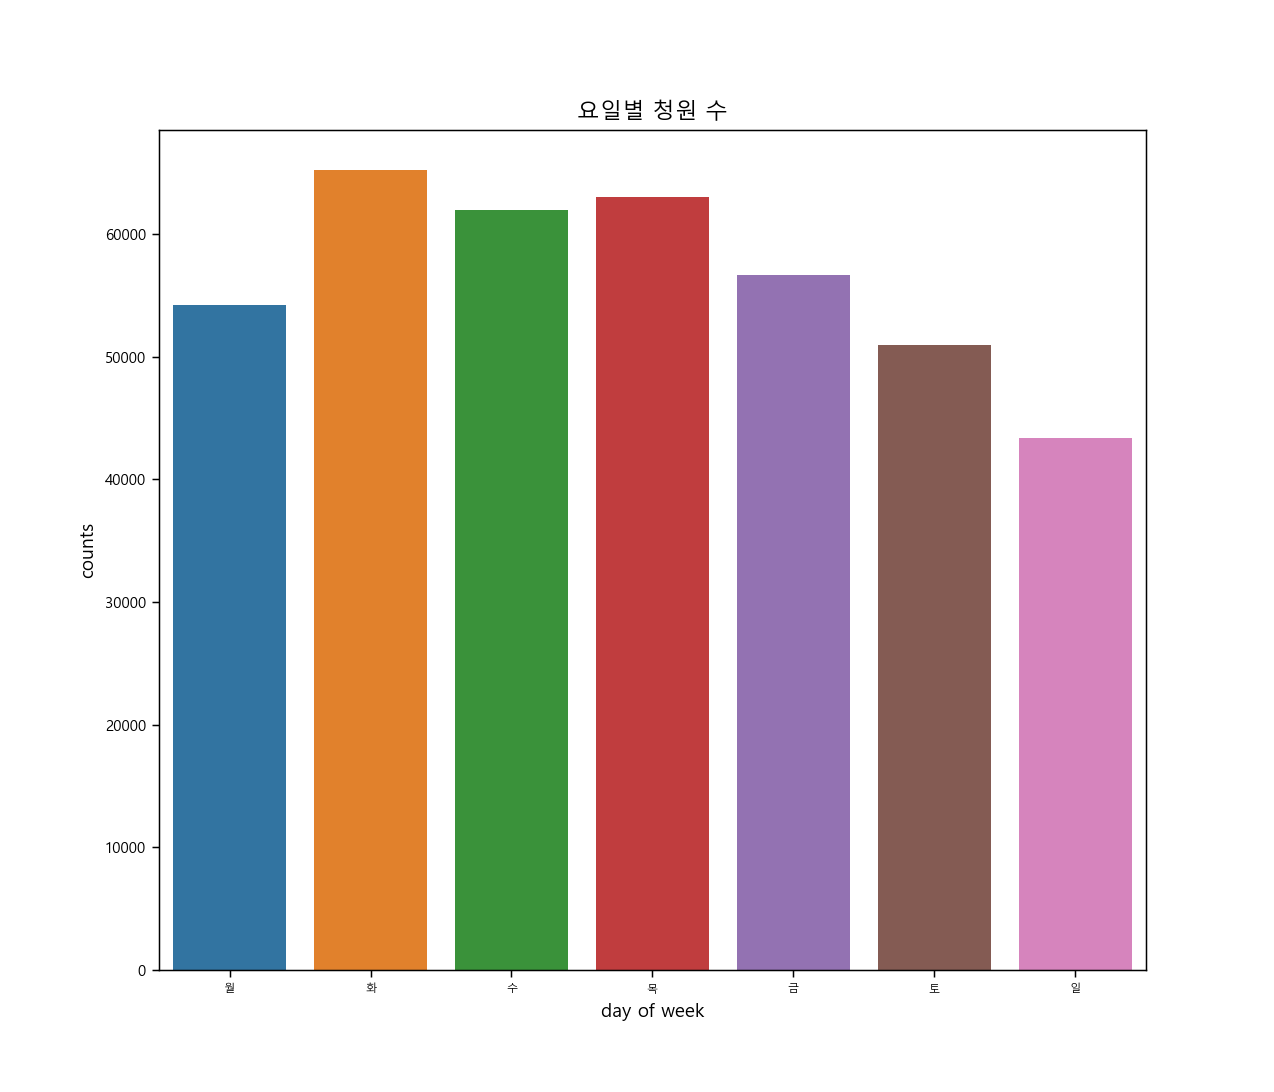

Text(0, 0.5, 'counts')

In [33]:
# 요일별 청원 수 그래프 그리기
ax = plt.subplots(figsize=(7,6))
ax = sns.countplot(x='start_dow', data=df)
plt.xticks([0,1,2,3,4,5,6],['월','화','수','목','금','토','일'],fontsize=6)
plt.yticks(fontsize=8)
ax.set_title('요일별 청원 수', fontsize=12)
ax.set_xlabel('day of week', fontsize=10)
ax.set_ylabel('counts', fontsize=10)

- 년도별 청원 수는 약 30만건으로 2018년이 압도적으로 많았고, 월별 청원 수는 1월과 11월이 5만건 이상으로 가장 많았다. 요일별 청원수는 화,수,목요일이 6만건 이상으로 많은 편에 속하며 그 중에서도 화요일의 청원 수가 가장 많고, 목요일, 수요일 순이다. 한편, 일요일의 청원 수가 가장 적다.

### 청원이 가장 많이 들어온 날의 청원 분야 살펴보기

In [34]:
start_df = pd.DataFrame(df['start'].value_counts()).reset_index()
start_df.columns = ['start', 'counts']
start_df = start_df.sort_values('counts', ascending=False)
start_df.head(5)

,start,counts
0,2017-11-11,9623
1,2017-09-05,5952
2,2018-01-11,3368
3,2018-02-06,2631
4,2017-11-09,2487


In [35]:
# 2017년 11월 11일에 들어온 청원 분야
df_171111 = df.loc[df['start'] == '2017-11-11']
df_171111.head(5)

,article_id,start,end,answered,votes,category,title,content,answer,start_year,start_month,start_dow
30073,31383,2017-11-11,2017-12-11,0,1,정치개혁,이명박 출국금지,이명박 출국금지\n조속한 구속수사,0,2017,11,5
30074,31384,2017-11-11,2017-12-11,0,3,인권/성평등,조두순 출소 금지,조두순의 출소금지 특별법 제정을 촉구 합니다.,0,2017,11,5
30075,31386,2017-11-11,2017-12-11,0,39,정치개혁,이명박 출국금지,정의가 바로 선 나라를 만들기 위해 꼭...!,0,2017,11,5
30076,31387,2017-11-11,2017-12-11,0,2,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,0,2017,11,5
30077,31388,2017-11-11,2017-12-11,0,1,정치개혁,이명박출국금지시켜라,명박이을출국금지시키고 수사하라,0,2017,11,5


In [36]:
df_171111_cat = pd.DataFrame(df_171111.category.value_counts()).reset_index()
df_171111_cat.columns = ['category', 'counts']
df_171111_cat

,category,counts
0,정치개혁,7961
1,기타,865
2,미래,170
3,인권/성평등,154
4,안전/환경,128
5,외교/통일/국방,61
6,행정,59
7,경제민주화,47
8,육아/교육,46
9,일자리,25


- 정치개혁 분야가 7961건으로 가장 많았고 기타 865건, 미래 170건, 그리고 인권/성평등, 안전/환경 분야 순으로 많았다.

### 같은 날 투표를 가장 많이 받은 청원(분야) 살펴보기

In [37]:
# 투표 순으로 정렬하기
df_171111 = df_171111.sort_values('votes', ascending=False)
df_171111.head(5)

,article_id,start,end,answered,votes,category,title,content,answer,start_year,start_month,start_dow
39124,40497,2017-11-11,2017-12-11,0,58470,보건복지,"[도와주세요] ""간호사, 의료인인가요? 하인인가요? "" <전국 간호사 처우개선 청원>",[전국 간호사/간호학생 처우 개선 청원글]\n의료법 제 1장 제2조(의료인) ①이 ...,0,2017,11,5
34661,35990,2017-11-11,2017-12-11,0,15519,인권/성평등,"경찰을 대상으로 한 가정폭력, 성폭력 인식 재교육과 부적절한 대응의 처벌강화를 청원...","2017년 11월 2일 목요일, 한 '가정폭력 쉼터'에 가정폭력 가해자가 침입을 시...",0,2017,11,5
30254,31573,2017-11-11,2017-12-11,0,1863,외교/통일/국방,안보를 위해 여성도 병역의 의무를 이행해야 합니다.(3차 청원),1차 청원(2017년 8월 30일 ~ 9월 14일) : 12만 3204명\n2차 청...,0,2017,11,5
30747,32068,2017-11-11,2017-12-11,0,1364,문화/예술/체육/언론,우리의 조상 단군할아버지를 고물상에 버린 학교장을 처벌해 주시기 바랍니다.,존경하고 사랑하는 대통령님! 청와대 관계자님! 저는 홍익문화운동연합 회장 정성률입니...,0,2017,11,5
30501,31820,2017-11-11,2017-12-11,0,843,교통/건축/국토,"과적을 요구 하지 않으면 과적은 없습니다. 알선소,화주,업체 대기업 마저 4.5톤차...",화물차 기사님들도 과적을 원치 않습니다.\n과적을 하게 되면 차 수리비나 소모품이 ...,0,2017,11,5


- 보건복지 분야의 <전국 간호사 처우개선 청원> 투표 수가 58470건으로 가장 많았다.

### 투표를 가장 많이 받은 날 투표 수가 가장 높은 청원 살펴보기

In [38]:
# 투표를 가장 많이 받은 날 찾기
petitions_start = pd.pivot_table(df, index=['start'], aggfunc=np.sum)
petitions_start = petitions_start.drop(['answer','answered','article_id'],axis=1)
votes_df = petitions_start.sort_values(by='votes', ascending=False)
votes_df.loc[petitions_start['votes'] > 700000]

,start_dow,start_month,start_year,votes
start,,,,
2018-10-17,1852,9260,1868668,1300523
2018-10-31,2020,10100,2038180,827096
2018-06-13,1084,3252,1093756,786157
2018-10-18,3096,10320,2082576,721524
2018-02-19,0,1396,1408564,701520


- 2018년 10월 17일에 투표 수 1,300,523건으로 투표를 가장 많이 받았다.

In [39]:
# 2018-10-17에 투표 수가 가장 높은 청원 찾기
df_181017 = df.loc[df['start'] == '2018-10-17']
df_181017 = df_181017.sort_values('votes', ascending=False)
df_181017.head(5)

,article_id,start,end,answered,votes,category,title,content,answer,start_year,start_month,start_dow
313314,408609,2018-10-17,2018-11-16,0,1192049,안전/환경,강서구 피시방 살인 사건. 또 심신미약 피의자입니다.,2018년 10월 14일 엊그제 일어난 강서구 피시방 살인사건에 대한 청원입니다.\...,1,2018,10,2
313619,408989,2018-10-17,2018-11-16,0,53615,인권/성평등,유흥탐정. 데이터베이스 성매매남성 조사합시다.,성매매는 불법입니다.\n이번에 유흥탐정 운영자 구속되었다고 하던데\n업주들만 쓴다는...,0,2018,10,2
314000,409477,2018-10-17,2018-11-16,0,5831,육아/교육,영양교사 제도를 폐지하고 본래의 식품위생직 공무원 선발로 환원해 주시기 바랍니다.,청원에 앞서 학교에서 따뜻하게 밥 한 끼를 만들어주시는 급식종사자 여러분들 그리고 ...,0,2018,10,2
313433,408759,2018-10-17,2018-11-16,0,4611,외교/통일/국방,[긴급]피지에 있는 400여명을 살려 주세요,제발 도와주십시오.\n피지에서 현대판 노예생활을 하고 있는 400여명을 제발 구해주...,0,2018,10,2
313534,408885,2018-10-17,2018-11-16,0,3484,외교/통일/국방,"*(긴급)제주 예맨 난민 339명 인도적체류 허가, 이게 정부냐",결국엔 모두 인도체류로 출도해제로 전국 어디로 갈수 있게 만들었다\n정부는...,0,2018,10,2


- 2018년 10월 17일, 안전/환경 분야의 <강서구 pc방 살인사건>에 관한 청원이 투표수 1,192,049건으로 압도적으로 많았다.